<a href="https://colab.research.google.com/github/dschloe/covid-dashboard-evan/blob/main/PART_I/Lecture_4_VISUALIZATION/plot_tree_color_changes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 개요
- skleran.tree.plot_tree의 색상을 바꿔보도록 한다. 
- matplotlib 객체지향의 구조를 알면 어렵지(?) 않게 바꿀 수 있다. 
- 간단하게 plot_tree 시각화를 구현해본다. 
  + 언제나 예제로 희생당하는 iris 데이터에게 애도를 표한다. 

In [31]:
!pip install -U matplotlib

     |████████████████████████████████| 11.2 MB 13.5 MB/s 
     |████████████████████████████████| 899 kB 58.8 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


1.0.2
3.5.1
(150, 4) (150,)
feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
class names ['setosa' 'versicolor' 'virginica']


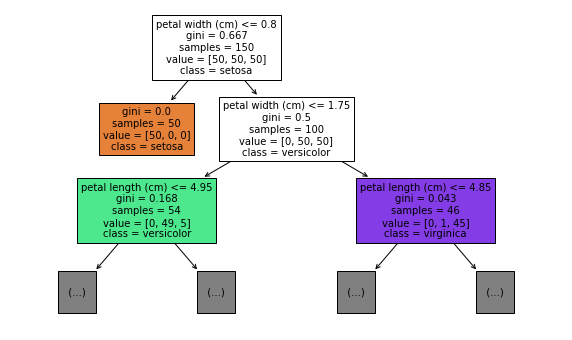

In [1]:
%matplotlib inline 

import sklearn
print(sklearn.__version__)
import matplotlib
print(matplotlib.__version__)

# 필수 라이브러리 불러오기
from sklearn.datasets import load_iris
from sklearn import tree 
import matplotlib.pyplot as plt

# 데이터 불러오기
iris = load_iris()
print(iris.data.shape, iris.target.shape)
print("feature names", iris.feature_names)
print("class names", iris.target_names)

# 모형 학습 및 plot_tree 그래프 구현
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(iris.data, iris.target)

fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, filled=True, feature_names = iris.feature_names, class_names = iris.target_names)
plt.show()

## plot_tree의 내부 구조
- 여기에서 필자는 위 그림들을 변경하고 싶었다. 
- 어떻게 변경하면 될까? 변경을 하기 위해서는 plot_tree를 객체로 담은 ax를 분해하도록 한다.
- 내부 구조를 보면 Matplotlib 라이브러리의 text.Annotation 클래스로 구성이 되어 있는 것을 확인할 수 있다. 

<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>
<class 'matplotlib.text.Annotation'>


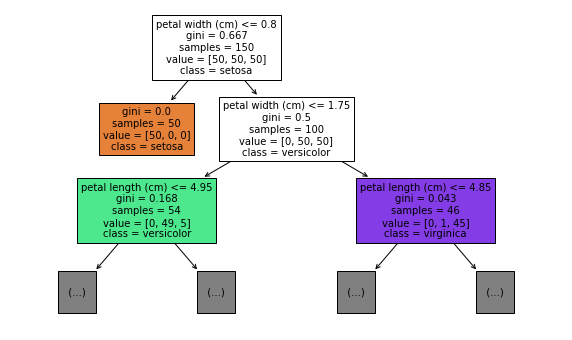

In [24]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, 
                    filled=True, 
                    feature_names = iris.feature_names, 
                    class_names = iris.target_names)

for i in range(0, len(ax)):
  print(type(ax[i]))

## Annotation 클래스
- Annotation 클래스의 공식문서 주소는 다음과 같다.  
  + https://matplotlib.org/stable/tutorials/text/annotations.html
- 이번에는 각 박스에 접근해서 스타일의 변화를 주도록 한다. 
  + 각 노드의 순서별로 접근 한 후, 홀수와 짝수 boxstyle에 변화를 주도록 한다. 

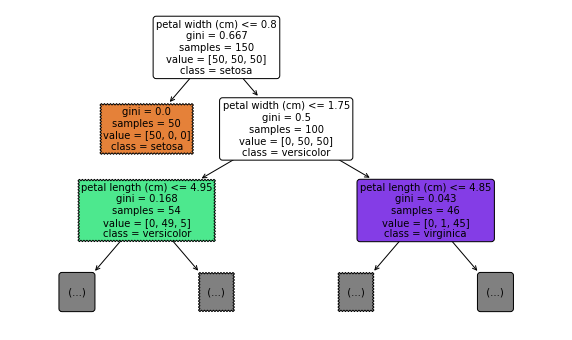

In [15]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
ax = tree.plot_tree(dt, max_depth = 2, 
                    filled=True, 
                    feature_names = iris.feature_names, 
                    class_names = iris.target_names)

for i in range(0, len(ax)):
  if i % 2 == 0:
    # set_boxtyle 적용
    ax[i].get_bbox_patch().set_boxstyle("round", pad=0.3)
  else:
    ax[i].get_bbox_patch().set_boxstyle("sawtooth", pad=0.3)

## 색상 변경
- 이번에는 set_facecolor의 색상에 변화를 주도록 한다. 
- 이 때, 색상 변화는 impurity 값과, value값에 따라 변화를 주도록 해본다. 
- 먼저 impurity와 value값을 각각 확인하도록 한다. 